# EMA Analyses

Kendra Wyant

In [ ]:

# handle conflicts
options(conflicts.policy = "depends.ok")
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/fun_ml.R?raw=true")


ℹ SHA-1 hash of file is "77e91675366f10788c6bcb59fa1cfc9ee0c75281"

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──
✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.9     
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

ℹ SHA-1 hash of file is "a58e57da996d1b70bb9a5b58241325d6fd78890f"

### Posterior Probabilities

In [ ]:

sim_auroc <- tibble(lag = rep(0, 10),
                    repeat_num = rep(1, 10),
                    fold_num = seq(1:10),
                    auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .88, sd = .04)) |> 
  bind_rows(tibble(lag = rep(0, 10),
                   repeat_num = rep(2, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .88, sd = .04))) |> 
   bind_rows(tibble(lag = rep(0, 10),
                   repeat_num = rep(3, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .88, sd = .04))) |> 
   bind_rows(tibble(lag = rep(24, 10),
                   repeat_num = rep(1, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .87, sd = .04))) |> 
   bind_rows(tibble(lag = rep(24, 10),
                   repeat_num = rep(2, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0,mean = .87, sd = .04))) |> 
   bind_rows(tibble(lag = rep(24, 10),
                   repeat_num = rep(3, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .87, sd = .04))) |> 
  bind_rows(tibble(lag = rep(72, 10),
                   repeat_num = rep(1, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .85, sd = .04))) |> 
   bind_rows(tibble(lag = rep(72, 10),
                   repeat_num = rep(2, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .85, sd = .04))) |> 
   bind_rows(tibble(lag = rep(72, 10),
                   repeat_num = rep(3, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .85, sd = .04))) |> 
  bind_rows(tibble(lag = rep(168, 10),
                   repeat_num = rep(1, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .82, sd = .04))) |> 
   bind_rows(tibble(lag = rep(168, 10),
                   repeat_num = rep(2, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .82, sd = .04))) |> 
   bind_rows(tibble(lag = rep(168, 10),
                   repeat_num = rep(3, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0,  mean = .82, sd = .04))) |> 
   bind_rows(tibble(lag = rep(336, 10),
                   repeat_num = rep(1, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .78, sd = .04))) |> 
   bind_rows(tibble(lag = rep(336, 10),
                   repeat_num = rep(2, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .78, sd = .04))) |> 
   bind_rows(tibble(lag = rep(336, 10),
                   repeat_num = rep(3, 10),
                   fold_num = seq(1:10),
                   auroc = truncnorm::rtruncnorm(n = 10, b = 1.0, mean = .78, sd = .04)))


In [ ]:

set.seed(101)
pp <- sim_auroc |> 
  pivot_wider(names_from = lag, values_from = auroc) |> 
  rename(id = repeat_num,
         id2 = fold_num) |> 
  perf_mod(formula = statistic ~ model + (1 | id2/id),
         transform = tidyposterior::logit_trans,  # for skewed & bounded AUC
         adapt_delta = .99,
         family = gaussian, 
)  



SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.243 seconds (Warm-up)
Chain 1:                0.564 seconds (Sampling)
Chain 1:                1.80

In [ ]:
pp_tidy <- pp |> 
  tidy(seed = 123) 

ci <- pp_tidy |> 
  summary() |> 
  mutate(model = factor(model, levels = c(0, 24, 72, 168, 336),
                        labels = c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag")),
         y = 1000)


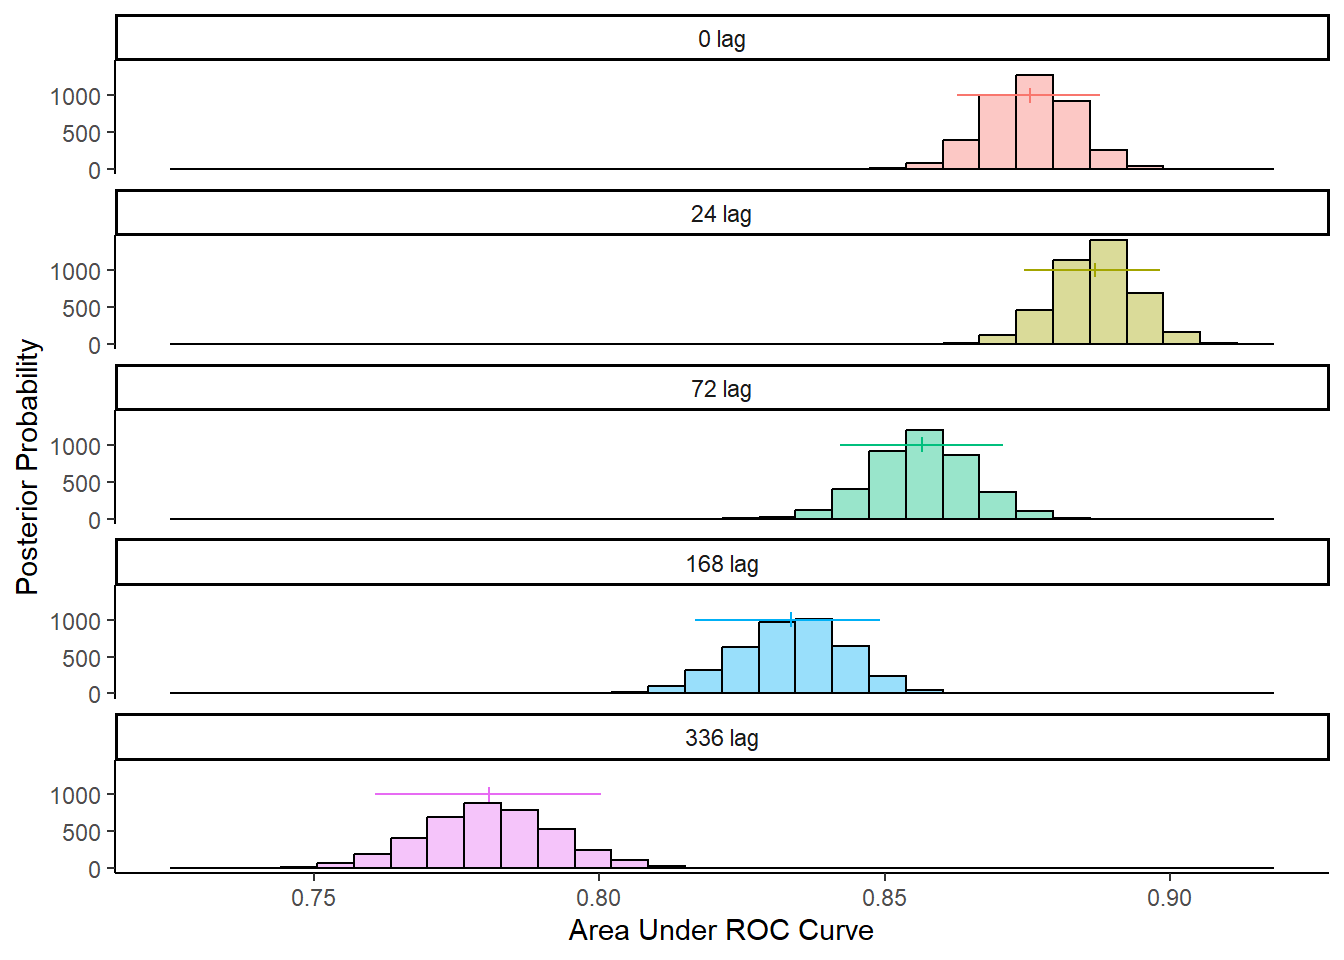

In [ ]:

pp_tidy |> 
  mutate(model = factor(model, levels = c(0, 24, 72, 168, 336),
                        labels = c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag"))) |>
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model), color = "black", alpha = .4, 
                 bins = 30) +
  geom_segment(mapping = aes(y = y+100, yend = y-100, x = mean, xend = mean,
                           color = model),
               data = ci) +
  geom_segment(mapping = aes(y = y, yend = y, x = lower, xend = upper, color = model),
                data = ci) +
  facet_wrap(~model, ncol = 1) +
  scale_y_continuous("Posterior Probability", breaks = c(0, 500, 1000)) +
  xlab("Area Under ROC Curve") +
  theme(legend.position = "none")


### Model Contrasts

In [ ]:
ci <- pp |>
  contrast_models(list("0", "24", "72", "168"), 
                  list("24", "72", "168", "336")) |> 
  summary(size = .01) |> 
  mutate(contrast = factor(contrast, 
                           levels = c("0 vs 24", "24 vs 72", "72 vs 168", "168 vs 336")),
         y = 700)


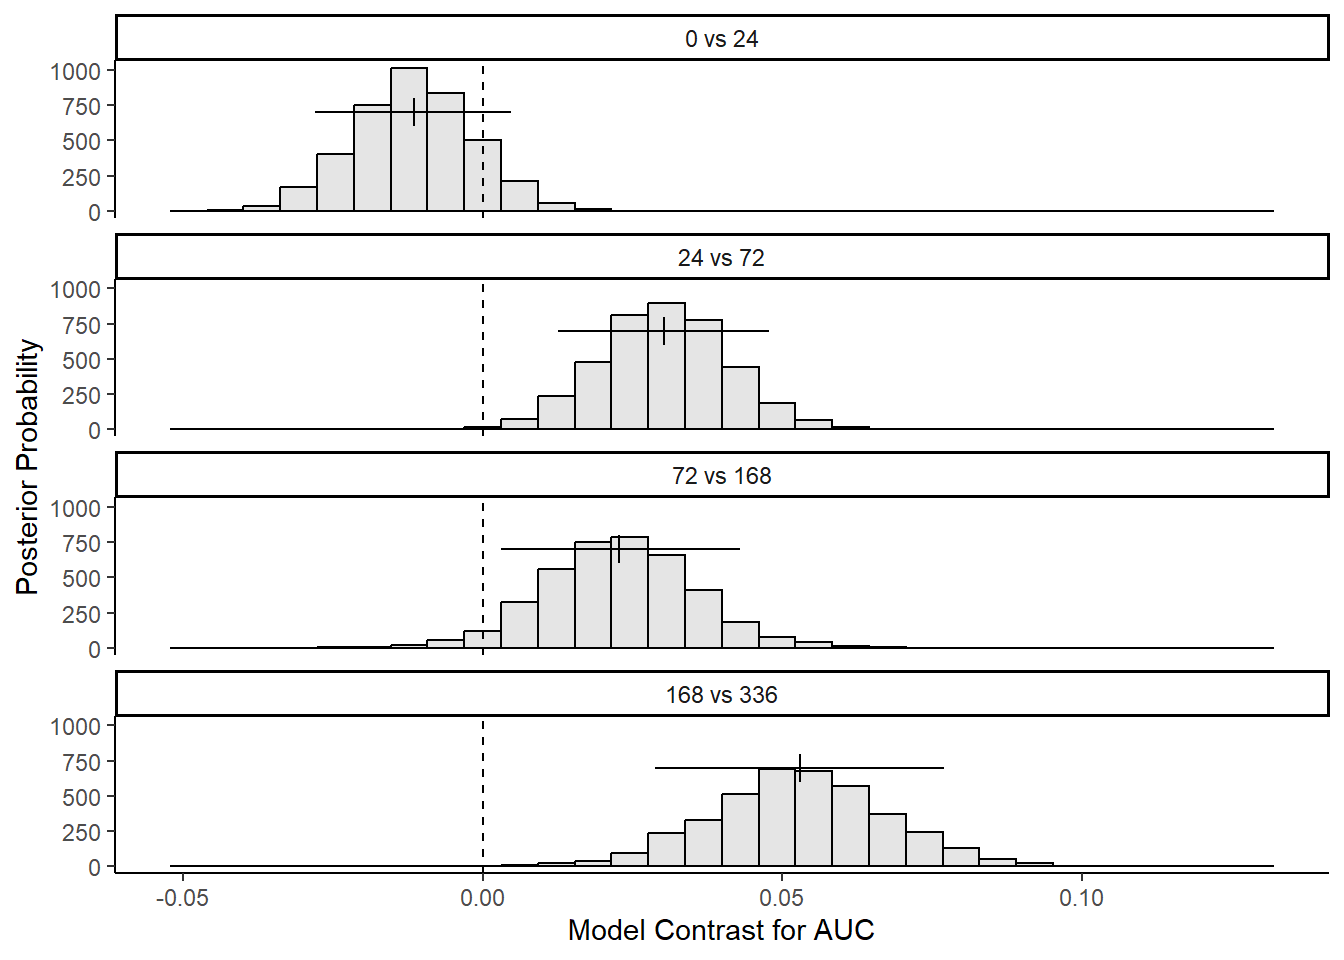

In [ ]:

pp |> 
  tidy(seed = 123) |>   
  group_by(model) |> 
  mutate(sample = row_number()) |> 
  ungroup() |> 
  pivot_wider(names_from = model, values_from = posterior) |> 
  mutate(`0 vs 24` = `0` - `24`,
         `24 vs 72` = `24` - `72`,
         `72 vs 168` = `72` - `168`,
         `168 vs 336` = `168` - `336`) |> 
  pivot_longer(cols = `0 vs 24`:`168 vs 336`,
               names_to = "contrast",
               values_to = "posterior") |> 
  mutate(contrast = factor(contrast, 
                           levels = c("0 vs 24", 
                                      "24 vs 72", 
                                      "72 vs 168",
                                      "168 vs 336"))) |> 
  ggplot() +
  geom_histogram(aes(x = posterior), 
                 color = "black", fill = "grey", 
                 alpha = .4, bins = 30) +
  geom_vline(xintercept = 0, linetype = "dashed") +
  geom_segment(mapping = aes(y = y+100, yend = y-100, x = mean, xend = mean), data = ci) +
  geom_segment(mapping = aes(y = y, yend = y, x = lower, xend = upper), data = ci) +
  facet_wrap(~contrast, ncol = 1) +
  ylab("Posterior Probability") +
  xlab("Model Contrast for AUC") +
  theme(legend.position = "none")
